In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

print(pd.__version__)


2.2.3


In [5]:
file_path = "/Users/chris/Desktop/fraudTest.csv"
df = pd.read_csv(file_path)

df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
X = df.drop(['trans_num', 'city_pop','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'merchant'], axis=1, errors='ignore')
y = df['is_fraud']

print(X.columns.tolist())

['Unnamed: 0', 'trans_date_trans_time', 'category', 'amt', 'gender', 'lat', 'long', 'job', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .2, random_state=42)

In [9]:
X_train.shape

(444575, 13)

In [10]:
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

print(pd.Series(y_train).value_counts(normalize=True))

is_fraud
0    0.996133
1    0.003867
Name: proportion, dtype: float64


In [11]:
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1 
)

In [12]:
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=3, scoring='f1')
print("\nCross-validation F1 scores:", cv_scores)
print("Average F1 score:", np.mean(cv_scores))


Cross-validation F1 scores: [1. 1. 1.]
Average F1 score: 1.0


In [13]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [14]:
y_pred = rf_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       1.00      1.00      1.00       426

    accuracy                           1.00    111144
   macro avg       1.00      1.00      1.00    111144
weighted avg       1.00      1.00      1.00    111144



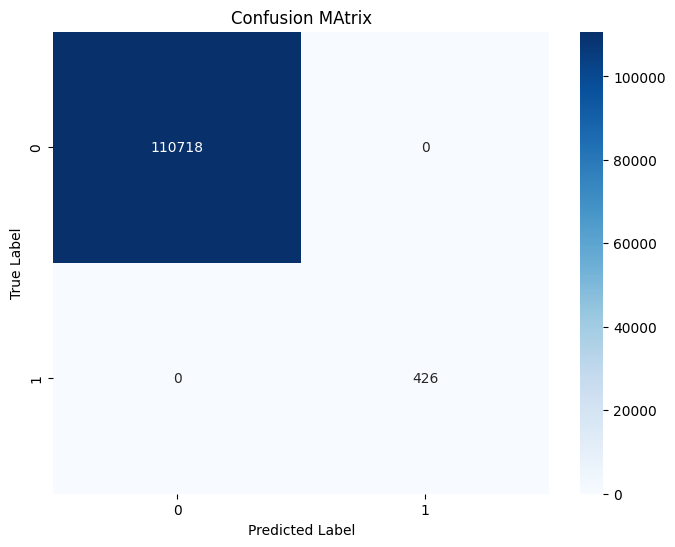

In [15]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion MAtrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()